In [2]:
import os
import re
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dataclasses import dataclass

CUDA(POST) duration_us avg: 6860.44 std: 86.44 count: 1124454
AMD64(ATT) duration_us avg: 4743.75 std: 1263.84 count: 1626222
Total duration 95.0 s


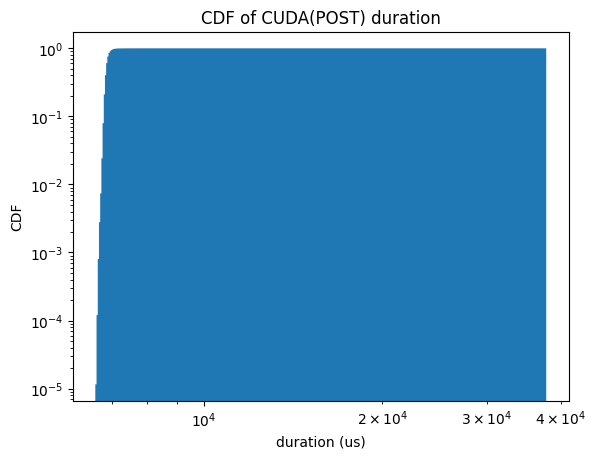

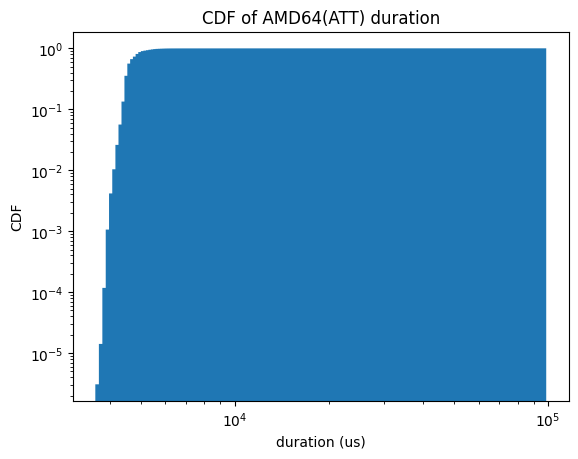

In [23]:
def process_log(log_file):
    return pd.read_csv(log_file, comment="#")

def parse_logs(log_dir):
    cuda_logs = []
    amd64_logs = []

    for root, _, files in os.walk(log_dir):
        for file in files:
            if file.endswith(".log"):
                if 'cuda' in file:
                    cuda_logs.append(process_log(os.path.join(root, file)))
                else:
                    amd64_logs.append(process_log(os.path.join(root, file)))

    start_timestamp = max([log['timestamp_ms'].min() for log in cuda_logs + amd64_logs])
    end_timestamp = min([log['timestamp_ms'].max() for log in cuda_logs + amd64_logs])

    # Filter logs to the same window
    cuda_logs = [log[(log['timestamp_ms'] >= start_timestamp) & (log['timestamp_ms'] <= end_timestamp)] for log in cuda_logs]
    amd64_logs = [log[(log['timestamp_ms'] >= start_timestamp) & (log['timestamp_ms'] <= end_timestamp)] for log in amd64_logs]

    # Get all duration_us and flatten into a single numpy array
    cuda_durations = np.concatenate([log['duration_us'].values for log in cuda_logs])
    amd64_durations = np.concatenate([log['duration_us'].values for log in amd64_logs])

    cuda_duration_avg = np.mean(cuda_durations)
    amd64_duration_avg = np.mean(amd64_durations)

    cuda_duration_std = np.std(cuda_durations)
    amd64_duration_std = np.std(amd64_durations)

    print(f'CUDA(POST) duration_us avg: {cuda_duration_avg:.2f} std: {cuda_duration_std:.2f} count: {len(cuda_durations)}')
    print(f'AMD64(ATT) duration_us avg: {amd64_duration_avg:.2f} std: {amd64_duration_std:.2f} count: {len(amd64_durations)}')

    print(f'Total duration {(end_timestamp - start_timestamp) // 1e3} s')

    plt.hist(cuda_durations, bins=1000, label='CUDA(POST)', density=True, cumulative=True, histtype='stepfilled')
    plt.title('CDF of CUDA(POST) duration')
    plt.xlabel('duration (us)')
    plt.ylabel('CDF')
    plt.yscale('log')
    plt.xscale('log')

    plt.show()

    plt.hist(amd64_durations, bins=1000, label='AMD64(ATT)', density=True, cumulative=True, histtype='stepfilled')
    plt.title('CDF of AMD64(ATT) duration')
    plt.xlabel('duration (us)')
    plt.ylabel('CDF')
    plt.yscale('log')
    plt.xscale('log')


parse_logs("/home/sadjad/temp/logs_b32_p560")